In [ ]:
Text provided under a Creative Commons Attribution license, CC-BY.  All code is made available under the FSF-approved BSD-3 license.  (c) Lorena A. Barba, Gilbert F. Forsyth 2017. Thanks to NSF for support via CAREER award #1149784.

[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
=====
***

Up to now, all of our work has been in one spatial dimension (Steps [1](./01_Step_1.ipynb) to [4](./05_Step_4.ipynb)). We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 

In the following exercises, you will extend the first four steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12. Let's get started!

Step 5: 2-D Linear Convection
----
***

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.  

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.  

With that in mind, our discretization of the PDE should be relatively straightforward.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

As before, solve for the only unknown:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


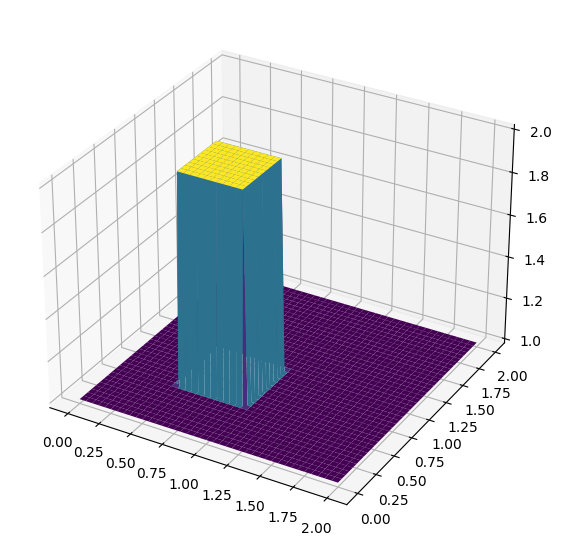

In [ ]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
un = numpy.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)



### 3D Plotting Notes

To plot a projected 3D result, make sure that you have added the Axes3D library.  

    from mpl_toolkits.mplot3d import Axes3D

The actual plotting commands are a little more involved than with simple 2d plots.

```python
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:])
```

The first line here is initializing a figure window.  The **figsize** and **dpi** commands are optional and simply specify the size and resolution of the figure being produced.  You may omit them, but you will still require the 
    
    fig = pyplot.figure()

The next line assigns the plot window the axes label 'ax' and also specifies that it will be a 3d projection plot.  The final line uses the command
    
    plot_surface()

which is equivalent to the regular plot command, but it takes a grid of X and Y values for the data point positions.  


##### Note


The `X` and `Y` values that you pass to `plot_surface` are not the 1-D vectors `x` and `y`.  In order to use matplotlibs 3D plotting functions, you need to generate a grid of `x, y` values which correspond to each coordinate in the plotting frame.  This coordinate grid is generated using the numpy function `meshgrid`.

    X, Y = numpy.meshgrid(x, y)

 

### Iterating in two dimensions

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 

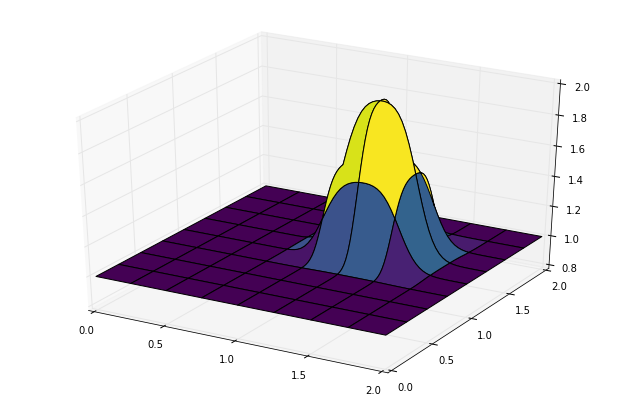

In [ ]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Array Operations
----------------

Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.  

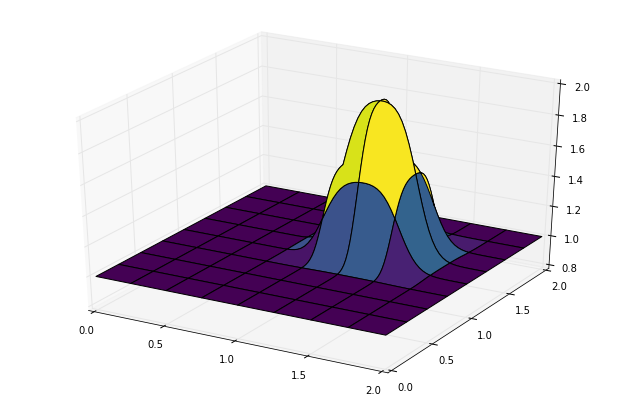

In [ ]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

    

## Learn More

The video lesson that walks you through the details for Step 5 (and onwards to Step 8) is **Video Lesson 6** on You Tube:

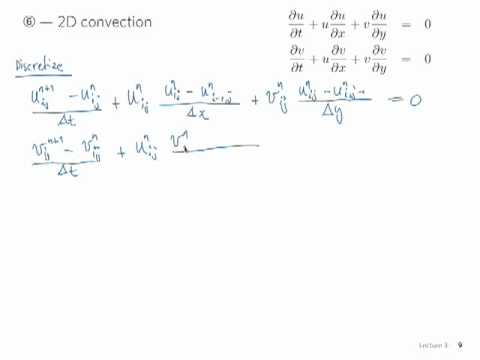

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f89b38c5-96be-4dcf-9b5d-e1b96d9b5992' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>